## Data Story Telling: Book Ratings Predictor
### Springboard Data Science Career Track, Capstone 1
***
- Author: H. Passmore
- Data: Amazon.com Book Reviews, access granted by Julian McAuley
- Capstone Description: [Project Proposal](https://github.com/PassMoreHeat/Capstone_Project_1/blob/master/ProjectProposal.md)
- Initial Data Approach: [Data Wrangling](https://github.com/PassMoreHeat/Capstone_Project_1/blob/master/DataWranglingReport.md)
***
## Data Story Table of Contents
1. Book review data questions
2. Review data trends
3. Data visualizations
4. Conclusions

In [44]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline, visualization style
%matplotlib inline
sns.set()

In [45]:
# import genre reviews
# load the pickled ISBN_10 DataFrame of Biology & Invertebrate Textbooks from hard drive in 'rb' mode
import pickle
with open('invertbiorevs.pickle','rb') as f:
    rev_texts = pickle.load(f) # change the name here and through out once the full data are here

In [46]:
# check the reviews DataFrame info
rev_texts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 10 columns):
_id               1663 non-null object
asin              1663 non-null object
helpful           1663 non-null object
overall           1663 non-null float64
reviewText        1663 non-null object
reviewTime        1663 non-null object
reviewerID        1663 non-null object
reviewerName      1654 non-null object
summary           1663 non-null object
unixReviewTime    1663 non-null int64
dtypes: float64(1), int64(1), object(8)
memory usage: 130.0+ KB


In [47]:
# check-out the DataFrame
rev_texts.head()

,_id,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,5a1f058a30ec5f57e707c294,003046224X,"[0, 0]",5.0,I loved the life science book it's just full o...,"09 10, 2013",A13MQTT3YQIDRS,Belia Russell,Life science,1378771200
1,5a1f058a30ec5f57e707c295,003046224X,"[5, 5]",5.0,My son is using this book for book 7th grade s...,"10 2, 2010",A2MHGJFVA5A6K3,blessed,excellent,1285977600
2,5a1f058a30ec5f57e707c296,003046224X,"[0, 0]",5.0,This book was very helpful for homework comple...,"10 2, 2013",A1KJS9N5D0W35R,Kimberly M. Berkey,Great life science book,1380672000
3,5a1f058a30ec5f57e707c297,003046224X,"[0, 0]",5.0,Great pictures. Great information. My son is u...,"11 11, 2013",AHXN35UA7T80O,Mary Lundquist,Great book,1384128000
4,5a1f058a30ec5f57e707c371,0030514339,"[1, 1]",1.0,I just finished my biology course for this sem...,"02 7, 2010",A1KCOD5478CHMV,"John Smith ""Bob""","you're kidding me, right?",1265500800


#### Section Summary: The DataFrame of reviews includes 10 columns and 1663 reviews ('reviewText') and ratings ('overall').

### 1) Book Review Data Questions
- Count reviews per book
- Count characters per review
- Count words per review
- Words and characters per star rating
- Longest word length, average word length...

In [48]:
# use DataFrame method .describe() to view summary stats of 'overall' rating field
rev_texts['overall'].describe()

count    1663.000000
mean        4.384847
std         1.039444
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: overall, dtype: float64

In [115]:
# count number of books in Biology Textbook review dataframe 
counts = rev_texts['asin'].value_counts()
print('The data include reviews for', len(counts), 'books.')

The data include reviews for 112 books.


In [50]:
# average, minimum and maximum number of reviews per book
print('Minimum reviews per book ', (np.min(counts)))
print('Maximum reviews per book ', (np.max(counts)))
print('Mean number of reviews per book ', (np.mean(counts)))

Minimum reviews per book  1
Maximum reviews per book  382
Mean number of reviews per book  14.848214285714286


In [110]:
# estimate word counts per review into a new column
rev_texts['words'] = rev_texts['reviewText'].str.split()
rev_texts['word_count'] = rev_texts.words.str.len()

In [111]:
# calculate longest word length (don't worry about removing punctuation yet) 
rev_texts['long_word'] = rev_texts['reviewText'].apply(lambda x: max(x.split(), key=len))
rev_texts['longest'] = rev_texts['long_word'].str.len()

In [112]:
# use .describe() to find average, minimum and maximum number of stars, characters, words and longest word per review
rev_texts['char_length'] = rev_texts['reviewText'].str.len()
rev_texts[['overall','char_length','word_count','longest']].describe()

,overall,char_length,word_count,longest
count,1663.000000,1663.000000,1663.000000,1663.000000
mean,4.384847,851.830427,143.650030,14.266386
std,1.039444,1084.998021,177.942875,7.385833
min,1.000000,8.000000,1.000000,6.000000
25%,4.000000,206.000000,36.000000,11.000000
50%,5.000000,440.000000,77.000000,13.000000
75%,5.000000,1016.500000,171.000000,16.000000
max,5.000000,11589.000000,1853.000000,253.000000


#### Section Summary: 
* This Biology Textbook genre subset of reviews includes reviews for 112 different books.
* The number of reviews per book ranges from 1 to 382 with an average of 15 per book.
* Average reviews are 851 characters or 143 words long.
* Reviews and awarded 4 stars on average.
* The longest review in this genre subset is 1,853 words long.
* The __longest word__ per review was 14 characters on average. Longest word calculation does not account for punctuation and needs cleaning up (e.g., maximum length word is 253 characters)

### 2) Review Data Trends
- Trends with number of stars
- Words per review and high or low ratings
- Longest word length and high or low ratings
- Average word length


In [116]:
# use DataFrame method .describe() to view summary stats of character count as a function of 'overall' rating
rev_texts.groupby('overall').char_length.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,61.0,883.557377,1042.223305,11.0,268.00,463.0,1108.00,5303.0
2.0,68.0,1293.411765,1516.427235,38.0,337.25,767.5,1462.25,7467.0
3.0,131.0,1319.503817,1603.774588,20.0,372.00,841.0,1516.00,11589.0
4.0,313.0,1002.990415,1121.635997,22.0,235.00,567.0,1417.00,6825.0
5.0,1090.0,722.893578,930.634688,8.0,186.00,373.0,826.75,7758.0


In [117]:
# use DataFrame method .describe() to view summary stats of word count as a function of 'overall' rating
rev_texts.groupby('overall').word_count.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,61.0,149.704918,174.061516,2.0,51.0,73.0,187.00,891.0
2.0,68.0,216.147059,245.323196,5.0,61.0,136.0,260.75,1282.0
3.0,131.0,221.977099,262.638871,4.0,65.5,140.0,253.50,1853.0
4.0,313.0,168.824281,181.719170,3.0,42.0,99.0,235.00,1052.0
5.0,1090.0,122.145872,153.439363,1.0,32.0,65.0,141.75,1341.0


In [118]:
# subset main DataFrame: 1 and 5 star reviews
one_five = rev_texts[rev_texts['overall'].isin([1,5])]
one_five.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1661
Data columns (total 16 columns):
_id               1151 non-null object
asin              1151 non-null object
helpful           1151 non-null object
overall           1151 non-null float64
reviewText        1151 non-null object
reviewTime        1151 non-null object
reviewerID        1151 non-null object
reviewerName      1143 non-null object
summary           1151 non-null object
unixReviewTime    1151 non-null int64
char_length       1151 non-null int64
words             1151 non-null object
word_count        1151 non-null int64
words2            1151 non-null object
long_word         1151 non-null object
longest           1151 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 152.9+ KB


In [120]:
# use .describe() to explore summary statistics of longest word length and 1 vs 5 stars
one_five.groupby('overall').word_count.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,61.0,149.704918,174.061516,2.0,51.0,73.0,187.00,891.0
5.0,1090.0,122.145872,153.439363,1.0,32.0,65.0,141.75,1341.0


In [119]:
# use .describe() to explore summary statistics of longest word length and 1 vs 5 stars
one_five.groupby('overall').longest.describe()

,count,mean,std,min,25%,50%,75%,max
overall,,,,,,,,
1.0,61.0,14.540984,4.642463,7.0,11.0,14.0,17.0,26.0
5.0,1090.0,14.014679,8.551028,6.0,11.0,13.0,15.0,253.0


#### Section Summary: 
* This genre subset of Biology Textbooks reviews with ratings from 1 to 5 stars:
    * Only 61 of the reviews were paired with one-star ratings (the lowest rating).
    * Reviews with 5-stars (n = 1090) are the most common and they out number all other star-ratings combined.
* The longest reviews are associated with the 2-star and 3-star ratings categories.
* Sample sizes for 1-star vs. 5-star categories are disparate, but word counts and longest word length are comparable.

### 3) Data visualizations
- Frequency histogram of star ratings (histogram)
- Compare review features 1 star vs 5 star 
- Number of words vs number of stars (scatterplot)
- Follow one frequently reviewed book over time: how do star ratings change over time? (a potential peer effect; time-series plot).

In [127]:
# convert 'overall' from float64 to int64
rev_texts['overall'] = rev_texts['overall'].astype(np.int64)

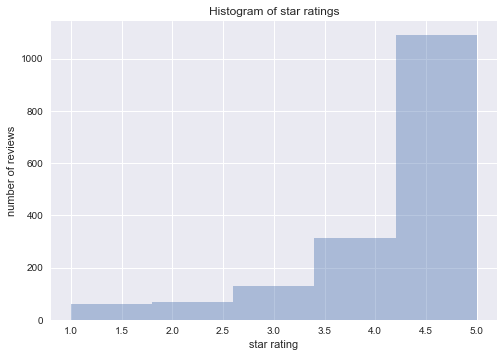

In [125]:
# frequency histogram of star ratings
sns.distplot(rev_texts.overall, bins=5, kde=False);
plt.title('Histogram of star ratings');
plt.xlabel('star rating');
plt.ylabel('number of reviews');

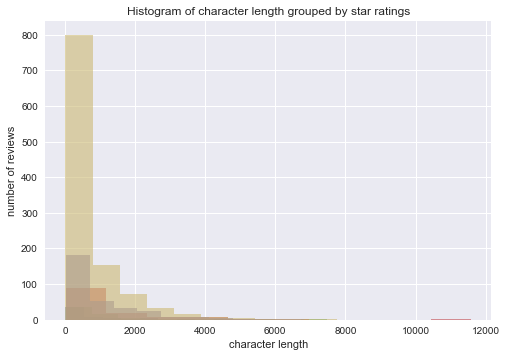

In [145]:
# compare review text features for 1-star vs 5-star reviews 
rev_texts.groupby('overall').char_length.hist(alpha=0.6);
plt.title('Histogram of character length grouped by star ratings');
plt.xlabel('character length');
plt.ylabel('number of reviews');

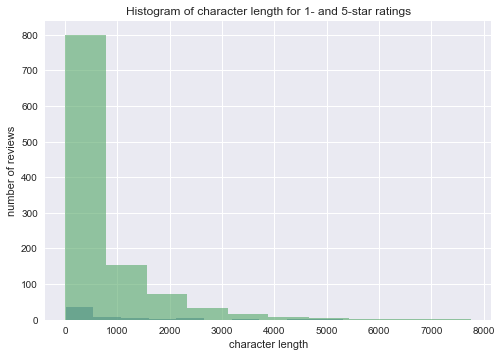

In [146]:
# compare review text features for 1-star vs 5-star reviews
one_five.groupby('overall').char_length.hist(alpha=0.6);
plt.title('Histogram of character length for 1- and 5-star ratings');
plt.xlabel('character length');
plt.ylabel('number of reviews');

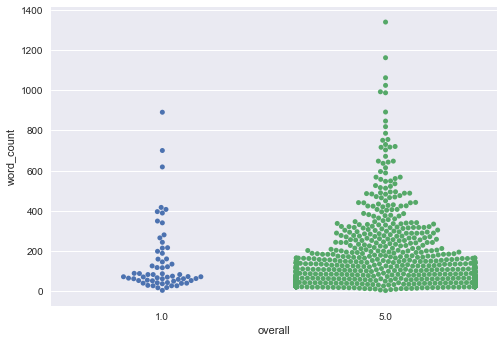

In [129]:
# most reviews have 200 words or less. Since we have so many 5-star reviews more of them are 'outliers'
# swarmplot of review length and 1 vs 5 stars
sns.swarmplot(x='overall', y= 'word_count', data=one_five);

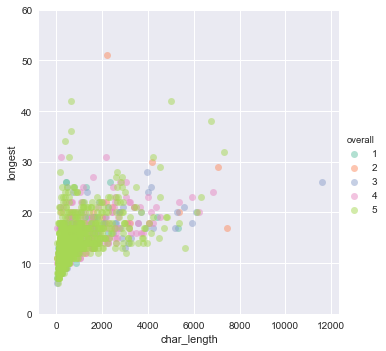

In [148]:
# how closely related are the number of characters per review and the length of the longest word?
# with seaborn plot scatter plot of review character count against longest word length colored by 'overall'
sns.lmplot(x='char_length', y='longest', hue='overall', palette='Set2', data=rev_texts, fit_reg=False, scatter_kws={'alpha':0.5});
plt.ylim(0,60); # limit y-axis to hide the very-long-word ouliers that I will deal with later

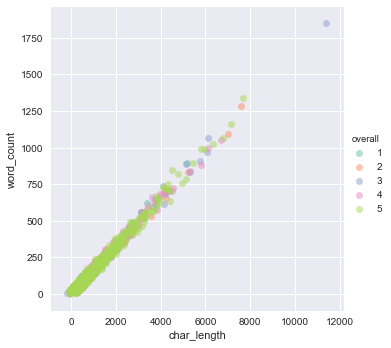

In [149]:
# word count and number of characters will certainly be closely related, but let's look
# with seaborn plot scatter plot of review character count against longest word length colored by 'overall'
sns.lmplot(x='char_length', y='word_count', hue='overall', palette='Set2', data=rev_texts, fit_reg=False, x_jitter=200, scatter_kws={'alpha':0.5});
#plt.ylim(0,60); # limit y-axis to hide the very-long-word ouliers that I will deal with later

### 4) Conclusions
- __Sythesis__: Characterizing Amazon book reviews of Biology Textbooks (and associated non-fiction titles) quantitatively indicates that many more reviewers assign 5-stars to a book than any other rating. Both negatively (1 to 2 stars) and positively (4 to 5-stars) rated books get reviews ranging from one word to up to 1000 words. A quick-and-dirty estimate of the length of the longest word per review does not reveal any outstanding pattern relating to ratings or word count, but the metric does need refining as the outliers are probably just words strung together without spaces. My data includes many books that only have one or few reviews and one book reviewed by 382 reviewers.
- __Conclusions__: This sub-sampled set of reviews in a specific genre match general trends from the large source-database. The original database of 22,507,155 book reviews is 62% 5-star reviews. The Biology Textbook reviews consist of 65% 5-star reviews. The paucity of low rated books may mean that I need a larger subsample to be able to make predictions about ratings based on review text.
- __Future directions__: Besides growing my Biology Textbook review sample size I expect that gaining insights from the content, not just quantitative metrics, will give me more insight into the nature of low and highly-rated books. I will use more refined methods to count words, assess word lengths, and build additional features to contribute to the characterization of reviews. Another interesting feature of the Amazon review format is that reviewers include a short 'summary' of their review, separate from the text of the review. Can this short summary predict ratings as well as long reviews? Can the sentiment of the summary encapsulate the feelings of the reviewer towards the book?
***